 ***Microsoft Stock Data***






In [ ]:
#import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [ ]:
#Load DataSet
from google.colab import files
upload=files.upload()

Saving MSFT.csv to MSFT.csv


In [ ]:
df=pd.read_csv('MSFT.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9083 entries, 0 to 9082
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9083 non-null   object 
 1   Open       9083 non-null   float64
 2   High       9083 non-null   float64
 3   Low        9083 non-null   float64
 4   Close      9083 non-null   float64
 5   Adj Close  9083 non-null   float64
 6   Volume     9083 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 496.9+ KB


In [ ]:
df.set_index('Date',drop=True,inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


***We'll use Only Close Features***

In [ ]:
df=df[['Close']]

In [ ]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2022-03-18,300.429993
2022-03-21,299.160004
2022-03-22,304.059998


In [ ]:
df.describe()

,Close
count,9083.000000
mean,41.335628
std,59.714567
min,0.090278
25%,4.075195
50%,26.840000
75%,39.937500
max,343.109985


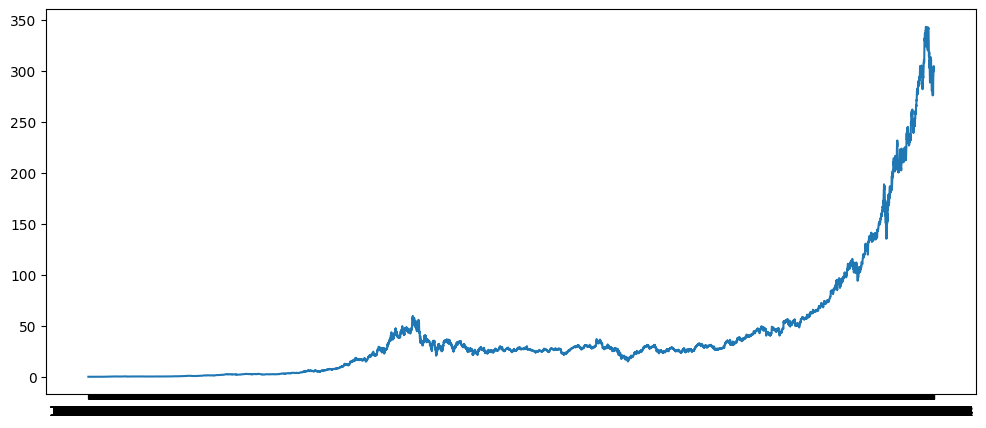

In [ ]:
plt.figure (1,figsize=(12,5))
plt.plot(df.Close);

***Calculate the percentage Change***
**The Reason for using pct_change Instead of the prices is the beniefit of normalization as we can measure all variables a comparable metric.Also returns have more manageable statistics properties than prices such as stationarity,as in most cases we don't statiobnary prices but we can have stationary returns.

A Stationary time series is one where statistical properties such as mean ,varience ,correlation ,etc are constant over Time**

In [ ]:
df['returns']=df.Close.pct_change()

In [ ]:
134.75-132.89-1

0.8600000000000136

***Calculate the log returns***

***Several benefits of using log returns, both theoretic and algorithmic.

First, log-normality: if we assume that prices are distributed log normally (which, in practice, may or may not be true for any given price series), then log(1 + r_i) is conveniently normally distributed, because:

    1 + r_i = \frac{p_i}{p_j} = \exp^{\log(\frac{p_i}{p_j})}

This is handy given much of classic statistics presumes normality***

In [ ]:
df['log_returns']=np.log(1+df['returns'])

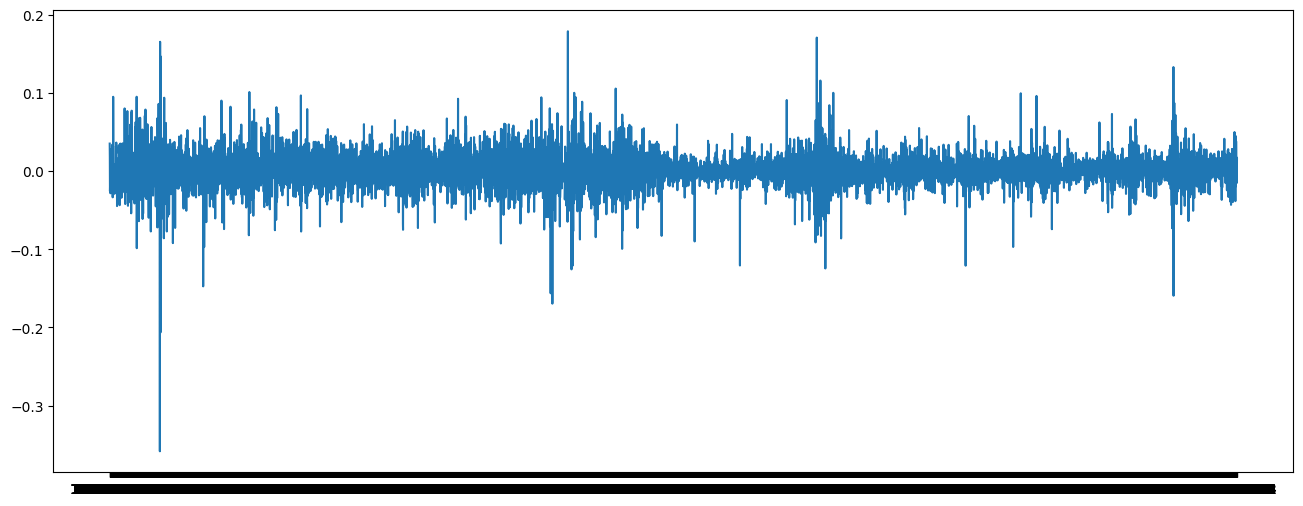

In [ ]:
plt.figure(1,figsize=(16,6))
plt.plot(df.log_returns)

In [36]:
#Drop NULL
df.dropna(inplace=True)
x=df[['Close','log_returns']].values


In [37]:
x

array([[ 1.00694000e-01,  3.50891917e-02],
       [ 1.02431000e-01,  1.71031861e-02],
       [ 9.98260000e-02, -2.57607307e-02],
       ...,
       [ 3.04059998e+02,  1.62464831e-02],
       [ 2.99489990e+02, -1.51440491e-02],
       [ 3.04100006e+02,  1.52756198e-02]])

In [52]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [55]:
x_scaler[:5]

array([[-0.69062809,  1.59840864],
       [-0.690599  ,  0.75786948],
       [-0.69064263, -1.24528795],
       [-0.6906717 , -0.86126061],
       [-0.69071531, -1.2987997 ]])

In [95]:
y=[x[0] for x in x_scaler ]

In [101]:
y[:5]

[-0.6906280902266285,
 -0.6905990010829361,
 -0.6906426264250884,
 -0.6906716988220084,
 -0.6907153074173882]

In [58]:
#Train Test Split

In [97]:
split=int(len(x_scaler)*0.8)
print(split)


7265


In [98]:
x_train=x_scaler[:split]
x_test=x_scaler[split: len(x_scaler)]
y_train=y[:split]
y_test=y[split: len(y)]

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,train_size=0.75,random_state=0)

In [102]:
len(x_train)==len(y_train)
len(x_test)==len(y_test)

True

***Labeling***
*we want to pridict the stock price at a future time .

as we going to use LSTM*

In [161]:
n=3
xtrain=[]
ytrain=[]
xtest=[]
ytest=[]
for i in range(n,len(x_train)):
    xtrain.append(x_train[i-n:i,:x_train.shape[1]]) #pridiction next record
    ytrain.append(y_train[i])
for i in range(n,len(x_test)):
    ytest.append(y_test[i])
    xtest.append(x_test[i-n:i,:x_test.shape[1]]) #pridiction next record

In [162]:
df.head()

,Close,returns,log_returns
Date,,,
1986-03-14,0.100694,0.035712,0.035089
1986-03-17,0.102431,0.017250,0.017103
1986-03-18,0.099826,-0.025432,-0.025761
1986-03-19,0.098090,-0.017390,-0.017543
1986-03-20,0.095486,-0.026547,-0.026906


In [163]:
xtrain[0]

array([[-0.21972049,  0.13279207],
       [-0.49710982,  0.74827861],
       [ 1.62074973,  0.58533444]])

In [164]:
ytrain[0]

-0.28310702240970176

In [165]:
val=np.array(ytrain[0])
val=np.c_[val,np.zeros(val.shape)]

In [166]:
scaler.inverse_transform(val)

array([[2.44349990e+01, 8.86161074e-04]])

In [167]:
xtrain,ytrain=[np.array(xtrain),np.array(ytrain)]

In [168]:
xtrain=np.reshape(xtrain ,(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2]))
xtest=np.array(xtest)
ytest=np.array(ytest)
xtest=np.reshape(xtest ,(xtest.shape[0],xtest.shape[1],xtest.shape[2]))


In [169]:
print(xtrain.shape)
print(ytrain.shape)
print("************************")
print(xtest.shape)
print(ytest.shape)

(6808, 3, 2)
(6808,)
************************
(2268, 3, 2)
(2268,)


In [170]:
##LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [171]:
model=Sequential()

In [172]:
model.add(LSTM(4,input_shape=(xtrain.shape[1],xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [173]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=16,verbose=1)

Epoch 1/50
426/426 [==============================] - 5s 5ms/step - loss: 1.0259 - val_loss: 0.9458
Epoch 2/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0205 - val_loss: 0.9433
Epoch 3/50
426/426 [==============================] - 2s 5ms/step - loss: 1.0196 - val_loss: 0.9428
Epoch 4/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0195 - val_loss: 0.9430
Epoch 5/50
426/426 [==============================] - 2s 5ms/step - loss: 1.0194 - val_loss: 0.9424
Epoch 6/50
426/426 [==============================] - 2s 5ms/step - loss: 1.0191 - val_loss: 0.9433
Epoch 7/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0195 - val_loss: 0.9424
Epoch 8/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0191 - val_loss: 0.9421
Epoch 9/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0192 - val_loss: 0.9420
Epoch 10/50
426/426 [==============================] - 2s 4ms/step - loss: 1.0191 - val_loss: 0.9420

In [174]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4)                 112       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [175]:
#invert pridiction
trainprediction=model.predict(xtrain)
testprediction=model.predict(xtest)

71/71 [==============================] - 0s 4ms/step


In [156]:
from sklearn.metrics import mean_squared_error

In [176]:
print(mean_squared_error(trainprediction,ytrain))

1.0163514446549322


In [177]:
ytrain

array([-0.28310702, -0.29424361,  0.24985899, ..., -0.27297519,
       -0.01093009, -0.52144498])

In [178]:
trainprediction


array([[ 0.04358709],
       [-0.05365378],
       [-0.02182905],
       ...,
       [ 0.01246042],
       [-0.00134046],
       [-0.00943948]], dtype=float32)

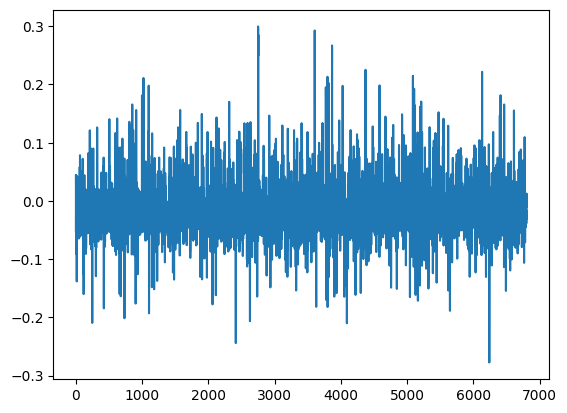

In [180]:
plt.plot(trainprediction)